In [10]:
from __future__ import print_function
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix
from numpy import ndarray
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

In [11]:
# Extracting the data set
mnist = input_data.read_data_sets("/data/", one_hot=True)

Extracting /data/train-images-idx3-ubyte.gz
Extracting /data/train-labels-idx1-ubyte.gz
Extracting /data/t10k-images-idx3-ubyte.gz
Extracting /data/t10k-labels-idx1-ubyte.gz


In [12]:
# Initializing the Parameters
learning_rate = 0.0001
training_epochs = 5
batch_size = 100
display_step = 0.5
a = np.zeros(shape=(10,10))
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [13]:
# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])


In [14]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
#Radial Basis
def RBF(x, C):
    """Computes distance from cluster centers defined in input C
    
    Both outdim and indim should be integers.
    """
    return -tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(tf.expand_dims(x,2),
                                                   tf.expand_dims(C,0))),1))

In [16]:
# Creating MLP model
def multilayer_perceptron(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    return layer_1

In [18]:
# Construct model
input_X = multilayer_perceptron(X)

logits = RBF(input_X,weights['out'])+biases['out']


cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
i = 0
train_accuracy = np.zeros((1,100))
avg_cost = np.zeros((1,100))
count = np.zeros((1,100))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(10000):
        batch = mnist.train.next_batch(100)
        

        if i%100 == 0:
            j = int(i/100)
            print(j)
            count[0][j-1] = j
            train_accuracy[0][j-1] = accuracy.eval(feed_dict={
                X:batch[0], Y: batch[1]})
            _,c = sess.run([train_step,cross_entropy],feed_dict={X:batch[0], Y:batch[1]})
            total_batches = j
            avg_cost[0][j-1] = c/total_batches 
            print("\rstep %d, training accuracy %g"%(i, train_accuracy[0][j-1]), end="" if i%10 else "\n")
        train_step.run(feed_dict={X: batch[0], Y: batch[1]})
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(" Testing Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    pred = tf.nn.softmax(logits)  # Applyinf Softmax to logits
    confusionmatrix = tf.contrib.metrics.confusion_matrix(tf.argmax(Y,1), tf.argmax(pred,1))
    print('confusion matrix \n', tf.Tensor.eval(confusionmatrix,feed_dict={X: mnist.train.images, Y: mnist.train.labels}, session= None) )


0
step 0, training accuracy 0.08


C:\Users\roope\Anaconda2\envs\tensorflow_session\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


1
step 100, training accuracy 0.09
2
step 200, training accuracy 0.06
3
step 300, training accuracy 0.18
4
step 400, training accuracy 0.25
5
step 500, training accuracy 0.28
6
step 600, training accuracy 0.32
7
step 700, training accuracy 0.4
8
step 800, training accuracy 0.59
9
step 900, training accuracy 0.63
10
step 1000, training accuracy 0.66
11
step 1100, training accuracy 0.7
12
step 1200, training accuracy 0.72
13
step 1300, training accuracy 0.72
14
step 1400, training accuracy 0.78
15
step 1500, training accuracy 0.69
16
step 1600, training accuracy 0.77
17
step 1700, training accuracy 0.79
18
step 1800, training accuracy 0.88
19
step 1900, training accuracy 0.82
20
step 2000, training accuracy 0.84
21
step 2100, training accuracy 0.79
22
step 2200, training accuracy 0.82
23
step 2300, training accuracy 0.79
24
step 2400, training accuracy 0.76
25
step 2500, training accuracy 0.82
26
step 2600, training accuracy 0.85
27
step 2700, training accuracy 0.78
28
step 2800, trainin

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
   29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
   43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
   57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
   71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
   85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
   99.   0.]]
9.00000035763
2.98163151741
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
   29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
   43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
   57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
   71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
   85.  86.  87.  88. 

0.025059901751
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
   29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
   43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
   57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
   71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
   85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
   99.   0.]]
77.999997139
0.0299888407743
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
   29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
   43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
   57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
   71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
   85.

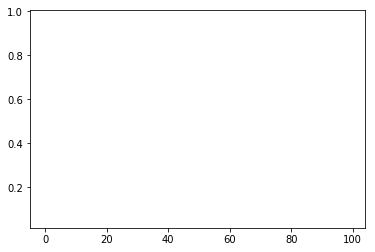

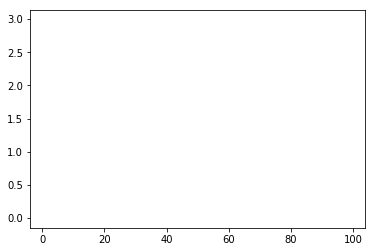

In [20]:
for i in range(60):
    print(count)
    print(train_accuracy[0][i]*100)
    print(avg_cost[0][i])



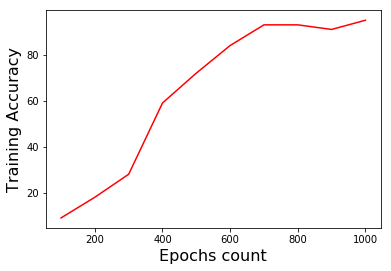

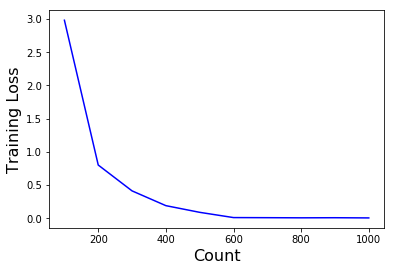

In [33]:
count = [100,200,300,400,500,600,700,800,900,1000]

train_accuracy = [9.00000035763,18.0000007153,28.0000001192,58.9999973774,72.000002861,83.9999973774, 92.9999995232, 93.0000007153, 91.0000023842, 94.9999988079]
avg_cost = [2.98163151741, 0.801394621531, 0.412109088898, 0.189699739218, 0.0891232032042, 0.0100773586167, 0.00850503861904, 0.00648891429106, 0.00799040753266, 0.00505039297928]
plt.plot(count, train_accuracy, 'r-')
plt.xlabel('Epochs count', fontsize=16)
plt.ylabel('Training Accuracy', fontsize=16)
#plt.axis([0, 6, 0, 20])
plt.show()

plt.plot(count, avg_cost, 'b-')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Training Loss', fontsize=16)
plt.show()
